In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# Load in Dataset

In [3]:
df=pd.read_csv("cybersecurity_attacks.csv")
df.head(2)

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

# DataCleaning

In [5]:
df.isnull().sum()

Timestamp                     0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Packet Type                   0
Traffic Type                  0
Payload Data                  0
Malware Indicators        20000
Anomaly Scores                0
Alerts/Warnings           20067
Attack Type                   0
Attack Signature              0
Action Taken                  0
Severity Level                0
User Information              0
Device Information            0
Network Segment               0
Geo-location Data             0
Proxy Information         19851
Firewall Logs             19961
IDS/IPS Alerts            20050
Log Source                    0
dtype: int64

In [6]:
df.drop(['Timestamp', 'Payload Data', 'Source Port', 'Destination Port', 'IDS/IPS Alerts', 'Source IP Address','Destination IP Address','User Information', 'Device Information','Geo-location Data', 'Firewall Logs', 'Proxy Information','Log Source'], axis=1, inplace=True)

In [7]:
df.columns

Index(['Protocol', 'Packet Length', 'Packet Type', 'Traffic Type',
       'Malware Indicators', 'Anomaly Scores', 'Alerts/Warnings',
       'Attack Type', 'Attack Signature', 'Action Taken', 'Severity Level',
       'Network Segment'],
      dtype='object')

In [8]:
# Use .loc accessor to avoid chained assignment
df.loc[:, 'Malware Indicators'].fillna('None Detected', inplace=True)
df.loc[:, 'Alerts/Warnings'].fillna('No Alert', inplace=True)

In [9]:
df.head()

,Protocol,Packet Length,Packet Type,Traffic Type,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Attack Signature,Action Taken,Severity Level,Network Segment
0,ICMP,503,Data,HTTP,IoC Detected,28.67,No Alert,Malware,Known Pattern B,Logged,Low,Segment A
1,ICMP,1174,Data,HTTP,IoC Detected,51.50,No Alert,Malware,Known Pattern A,Blocked,Low,Segment B
2,UDP,306,Control,HTTP,IoC Detected,87.42,Alert Triggered,DDoS,Known Pattern B,Ignored,Low,Segment C
3,UDP,385,Data,HTTP,None Detected,15.79,Alert Triggered,Malware,Known Pattern B,Blocked,Medium,Segment B
4,TCP,1462,Data,DNS,None Detected,0.52,Alert Triggered,DDoS,Known Pattern B,Blocked,Low,Segment C


# EDA

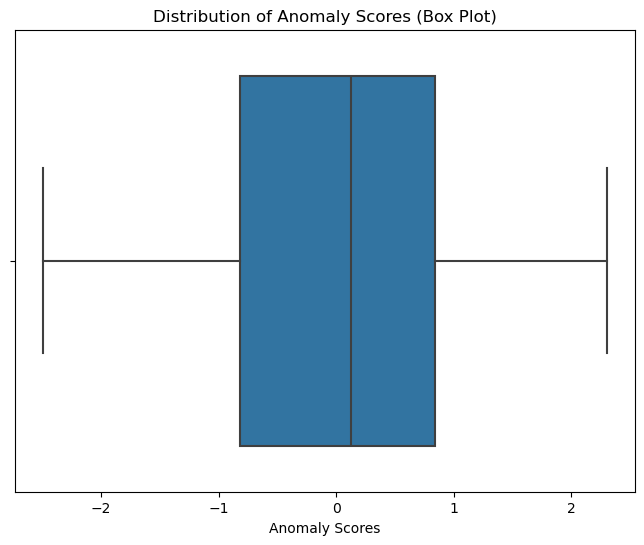

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


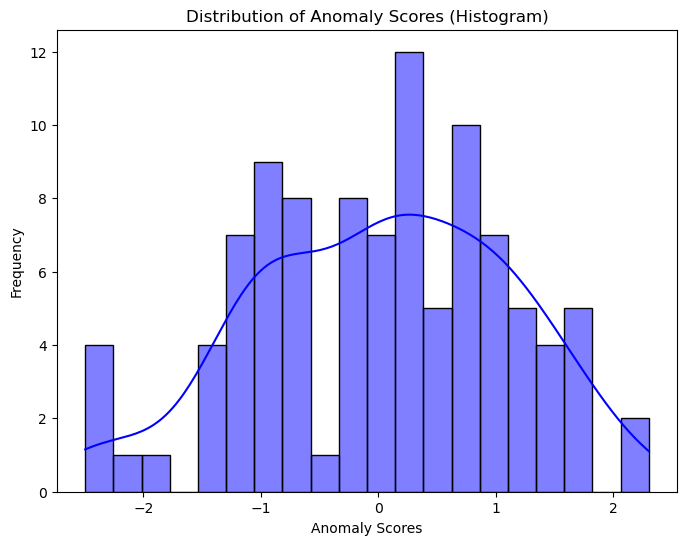

In [10]:
anomaly_scores = np.random.normal(size=100)

plt.figure(figsize=(8, 6))
sns.boxplot(x=anomaly_scores)
plt.title('Distribution of Anomaly Scores (Box Plot)')
plt.xlabel('Anomaly Scores')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(anomaly_scores, kde=True, bins=20, color='blue')
plt.title('Distribution of Anomaly Scores (Histogram)')
plt.xlabel('Anomaly Scores')
plt.ylabel('Frequency')
plt.show()

df.replace([np.inf, -np.inf], np.nan, inplace=True) #To remove 'use_inf_as_na' warning

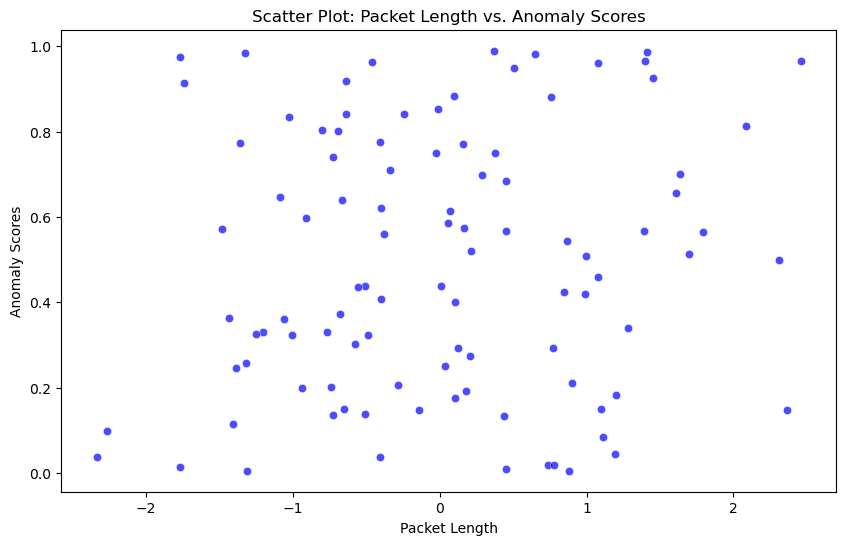

In [11]:
packet_length = np.random.normal(size=100)
anomaly_scores = np.random.uniform(low=0, high=1, size=100)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=packet_length, y=anomaly_scores, color='blue', alpha=0.7)
plt.title('Scatter Plot: Packet Length vs. Anomaly Scores')
plt.xlabel('Packet Length')
plt.ylabel('Anomaly Scores')
plt.show()

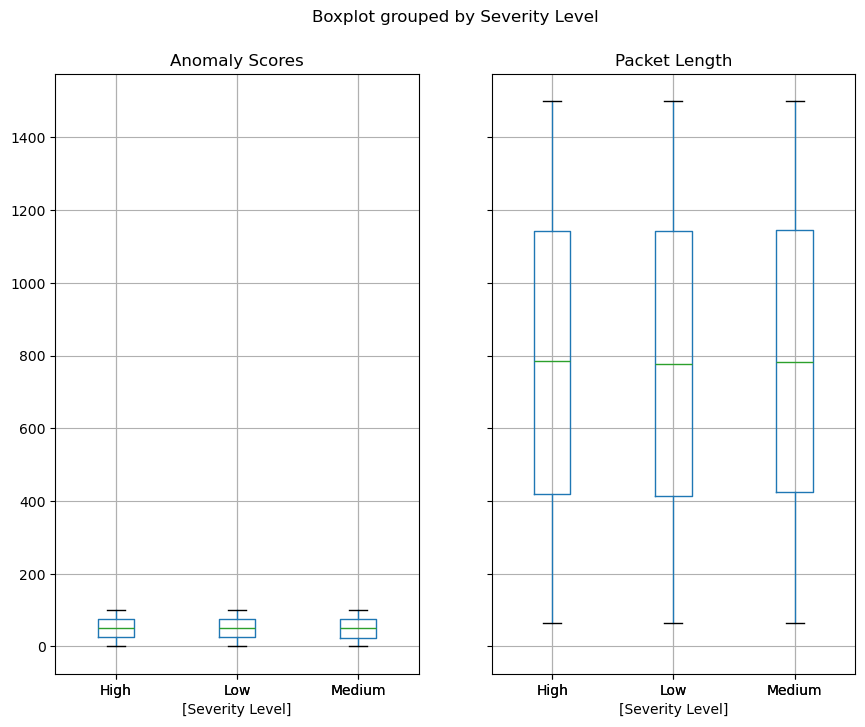

In [12]:
df.boxplot(figsize=(10,8), by='Severity Level')
plt.show()

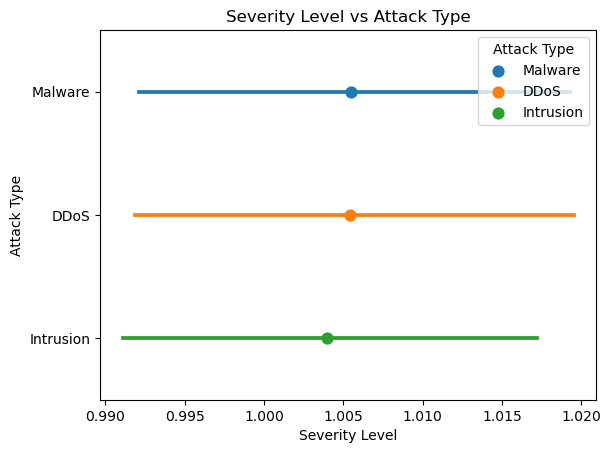

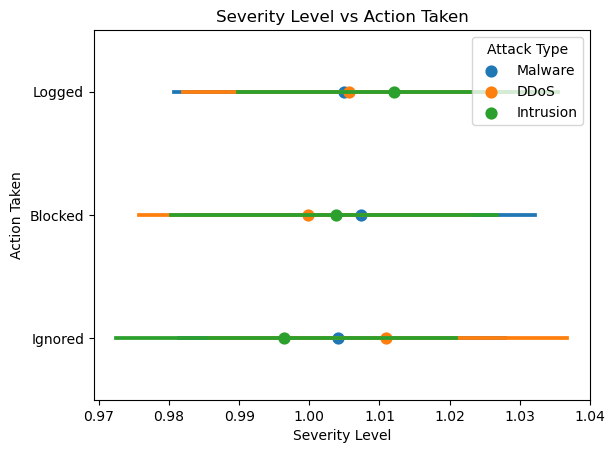

In [13]:
df['Severity Level'] = pd.factorize(df['Severity Level'])[0]

# Point plot for Attack Type
sns.pointplot(data=df, x="Severity Level", y="Attack Type", hue="Attack Type", markers="o", linestyles="")
plt.title("Severity Level vs Attack Type")
plt.xlabel("Severity Level")
plt.ylabel("Attack Type")
plt.legend(title="Attack Type", loc="upper right")
plt.show()

# Point plot for Action Taken
sns.pointplot(data=df, x="Severity Level", y="Action Taken", hue="Attack Type", markers="o", linestyles="")
plt.title("Severity Level vs Action Taken")
plt.xlabel("Severity Level")
plt.ylabel("Action Taken")
plt.legend(title="Attack Type", loc="upper right")
plt.show()

# PipeLines

In [14]:
df.columns

Index(['Protocol', 'Packet Length', 'Packet Type', 'Traffic Type',
       'Malware Indicators', 'Anomaly Scores', 'Alerts/Warnings',
       'Attack Type', 'Attack Signature', 'Action Taken', 'Severity Level',
       'Network Segment'],
      dtype='object')

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer



In [16]:
df['Anomaly Scores'].unique
plt

<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.11/site-packages/matplotlib/pyplot.py'>

In [17]:
categorical_features = ['Protocol', 'Packet Type', 'Traffic Type', 'Malware Indicators',
                         'Attack Type', 'Attack Signature', 'Action Taken', 'Network Segment', 'Alerts/Warnings','Severity Level']

numerical_features = ['Packet Length']

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

X_train = df [categorical_features + numerical_features]
y_train = df['Anomaly Scores']
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
])



In [18]:
X_transformed = pipeline.fit_transform(df)

In [19]:
A = pipeline.fit_transform(X_train, y_train)

In [20]:
A.shape

(40000, 27)

In [21]:
A

array([[ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.66929478],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.94353482],
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
         0.        , -1.14280809],
       ...,
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
         0.        ,  0.62866049],
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
         0.        , -0.7173672 ],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.94593844]])

# ML

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestRegressor


In [23]:
categorical_features = ['Protocol', 'Packet Type', 'Traffic Type', 'Malware Indicators',
                         'Attack Type', 'Attack Signature', 'Action Taken', 'Network Segment', 'Alerts/Warnings','Severity Level']

numerical_features = ['Packet Length']

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

X= df [categorical_features + numerical_features]
y= df['Anomaly Scores']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor) , ('model', RandomForestRegressor(n_estimators=100))
])

In [24]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Protocol', 'Packet Type',
                                                   'Traffic Type',
                                                   'Malware Indicators',
                                                   'Attack Type',
                                                   'Attack Signature',
                                                   'Action Taken',
                                                   'Network Segment',
                                                   'Alerts/Warnings',
                                                   'Severity Level']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Packet Length'])])),
                ('model', RandomForestRegressor())])

In [25]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Protocol', 'Packet Type',
                                                   'Traffic Type',
                                                   'Malware Indicators',
                                                   'Attack Type',
                                                   'Attack Signature',
                                                   'Action Taken',
                                                   'Network Segment',
                                                   'Alerts/Warnings',
                                                   'Severity Level']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Packet Length'])])),
                ('model', RandomForestRegressor())])

In [26]:
pipeline['model'].feature_importances_

array([0.02425921, 0.02394138, 0.02299937, 0.0210032 , 0.02078635,
       0.02062237, 0.01492962, 0.02073542, 0.02191849, 0.02153748,
       0.02409452, 0.02366567, 0.02468253, 0.02165232, 0.02139973,
       0.02404087, 0.02505328, 0.0243366 , 0.0232491 , 0.02312806,
       0.02386301, 0.02054997, 0.02078002, 0.02355628, 0.02336687,
       0.02258698, 0.4172613 ])

In [27]:
pipeline.feature_names_in_

array(['Protocol', 'Packet Type', 'Traffic Type', 'Malware Indicators',
       'Attack Type', 'Attack Signature', 'Action Taken',
       'Network Segment', 'Alerts/Warnings', 'Severity Level',
       'Packet Length'], dtype=object)

In [28]:
from sklearn.model_selection import cross_validate

cross_validate(pipeline, X_train, y_train, cv=5, scoring='r2', return_train_score=True)

{'fit_time': array([8.09076405, 8.2896657 , 7.99673796, 8.20582294, 8.18004179]),
 'score_time': array([0.14566302, 0.14846516, 0.14337516, 0.14570594, 0.14498734]),
 'test_score': array([-0.06800379, -0.0677103 , -0.07206339, -0.06083146, -0.05644575]),
 'train_score': array([0.85083489, 0.84994691, 0.85067804, 0.84934145, 0.84999809])}

# SVM

In [1]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
# Load your dataset into 'df'
df = pd.read_csv('cybersecurity_attacks.csv')

In [3]:
# Define features and target variable
categorical_features = ['Protocol', 'Packet Type', 'Traffic Type', 'Malware Indicators',
                         'Attack Type', 'Attack Signature', 'Action Taken', 'Network Segment', 'Alerts/Warnings']

numerical_features = ['Packet Length', 'Anomaly Scores']

In [5]:
# Define preprocessing transformer
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [6]:
# Create preprocessor for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
         ('num', 'passthrough', numerical_features)  # 'passthrough' for numerical features
    ])

In [8]:
# Split data into features (X) and target variable (y)
X = df[categorical_features + numerical_features]
y = df['Severity Level']

In [9]:
# Define SVM model with RBF kernel and different values of C
svm_models = [
    ('svm_linear', SVC(kernel='linear', C=0.05)),
    ('svm_rbf_1', SVC(kernel='rbf', C=0.002)),
    ('svm_rbf_10', SVC(kernel='rbf', C=0.003))
]

In [10]:
# Create pipelines for each SVM model
pipelines = []
for model_name, svm_model in svm_models:
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', svm_model)
    ])
    pipelines.append((model_name, pipeline))

In [11]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=42, stratify=y)

In [12]:
# Fit pipelines to training data and evaluate performance
for model_name, pipeline in pipelines:
    pipeline.fit(X_train, y_train)
    accuracy = pipeline.score(X_test, y_test)
    print(f"Model: {model_name}, Accuracy: {accuracy}")


Model: svm_linear, Accuracy: 0.3335
Model: svm_rbf_1, Accuracy: 0.33586666666666665
Model: svm_rbf_10, Accuracy: 0.33586666666666665


# KNN

In [39]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Load your dataset into 'df'
df = pd.read_csv('cybersecurity_attacks.csv')

# Define features and target variable
categorical_features = ['Protocol', 'Packet Type', 'Traffic Type', 'Malware Indicators',
                        'Attack Type', 'Attack Signature', 'Action Taken', 'Network Segment', 'Alerts/Warnings']
numerical_features = ['Packet Length', 'Anomaly Scores']

# Define preprocessing transformers
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features)
    ])

# Define RandomForestClassifier model
rf_model = RandomForestClassifier(n_estimators=100)

# Pipeline combining preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', rf_model)
])

# Split data into features (X) and target variable (y)
X = df[categorical_features + numerical_features]
y = df['Severity Level']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

# Fit pipeline to training data
pipeline.fit(X_train, y_train)

# Evaluate model performance
accuracy = pipeline.score(X_test, y_test)
print("Accuracy:", accuracy)

# Access feature importances
importances = pipeline['model'].feature_importances_
print("Feature Importances:", importances)


Accuracy: 0.34725
Feature Importances: [0.0148547  0.01503184 0.01382686 0.0161073  0.01603837 0.01410586
 0.01544834 0.01564126 0.01410263 0.01420282 0.01799617 0.01746159
 0.01772556 0.01604926 0.01595296 0.01555049 0.01554078 0.01472027
 0.01343631 0.01471042 0.01502401 0.01566096 0.01563402 0.32146914
 0.32370807]


In [40]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Protocol', 'Packet Type',
                                                   'Traffic Type',
                                                   'Malware Indicators',
                                                   'Attack Type',
                                                   'Attack Signature',
                                                   'Action Taken',
                                                   'Network Segment',
                                                   'Alerts/Warnings']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Packet Length',
                                                   'Anomaly Scores'])])),
                ('model', RandomForestClassifier())])

In [41]:
importances=pipeline['model'].feature_importances_
importances

array([0.01572307, 0.01536237, 0.01465247, 0.01571818, 0.015397  ,
       0.01507657, 0.01539498, 0.01653286, 0.01369743, 0.01402034,
       0.01769773, 0.01741697, 0.01765239, 0.01486386, 0.01493142,
       0.01622395, 0.01633339, 0.01559378, 0.01536039, 0.01537689,
       0.01608006, 0.01667645, 0.01667021, 0.31855557, 0.31899164])

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import pandas as pd

# Load your dataset into 'df'
df = pd.read_csv('cybersecurity_attacks.csv')

# Define features and target variable
categorical_features = ['Protocol', 'Packet Type', 'Traffic Type', 'Malware Indicators',
                        'Attack Type', 'Attack Signature', 'Action Taken', 'Network Segment', 'Alerts/Warnings']
numerical_features = ['Packet Length', 'Anomaly Scores']

# Define preprocessing transformers
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features)
    ])

# Define RandomForestClassifier model
rf_model = RandomForestClassifier(n_estimators=100)

# Pipeline combining preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', rf_model)
])

# Split data into features (X) and target variable (y)
X = df[categorical_features + numerical_features]
y = df['Severity Level']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

# Fit pipeline to training data
pipeline.fit(X_train, y_train)

# Evaluate model performance
accuracy = pipeline.score(X_test, y_test)
print("Accuracy:", accuracy)

# Access feature importances
importances = pipeline['model'].feature_importances_
print("Feature Importances:", importances)


Accuracy: 0.35075
Feature Importances: [0.01457763 0.01410369 0.0144547  0.01585251 0.01598653 0.01542996
 0.01622656 0.01692002 0.01351782 0.01353103 0.0181079  0.01785381
 0.01888356 0.01553752 0.01545891 0.01583023 0.01607139 0.01548421
 0.0140914  0.01427438 0.01494771 0.01633802 0.0165439  0.31823023
 0.32174637]


In [44]:
ft_names = pipeline['preprocessor'].get_feature_names_out()
ft_names

array(['cat__Protocol_ICMP', 'cat__Protocol_TCP', 'cat__Protocol_UDP',
       'cat__Packet Type_Control', 'cat__Packet Type_Data',
       'cat__Traffic Type_DNS', 'cat__Traffic Type_FTP',
       'cat__Traffic Type_HTTP', 'cat__Malware Indicators_IoC Detected',
       'cat__Malware Indicators_nan', 'cat__Attack Type_DDoS',
       'cat__Attack Type_Intrusion', 'cat__Attack Type_Malware',
       'cat__Attack Signature_Known Pattern A',
       'cat__Attack Signature_Known Pattern B',
       'cat__Action Taken_Blocked', 'cat__Action Taken_Ignored',
       'cat__Action Taken_Logged', 'cat__Network Segment_Segment A',
       'cat__Network Segment_Segment B', 'cat__Network Segment_Segment C',
       'cat__Alerts/Warnings_Alert Triggered', 'cat__Alerts/Warnings_nan',
       'num__Packet Length', 'num__Anomaly Scores'], dtype=object)

In [45]:
from sklearn.model_selection import StratifiedKFold

In [46]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [47]:
cross_validate(pipeline, X_train, y_train, cv=cv, scoring='accuracy', return_train_score=True)

{'fit_time': array([2.15207791, 2.12866116, 2.08726406, 2.07989597, 2.08338404]),
 'score_time': array([0.13537502, 0.135777  , 0.130512  , 0.13332701, 0.13063097]),
 'test_score': array([0.33680556, 0.33597222, 0.33597222, 0.33736111, 0.34125   ]),
 'train_score': array([1., 1., 1., 1., 1.])}

In [48]:
from sklearn.metrics import make_scorer, f1_score, accuracy_score, precision_score, recall_score, roc_auc_score

In [49]:
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1_micro': make_scorer(f1_score, average='micro'),
    'f1_macro': make_scorer(f1_score, average='macro'),
    'precision_macro': make_scorer(precision_score, average='macro'),
    'recall_macro': make_scorer(recall_score, average='macro'),
}

In [50]:
results = cross_validate(pipeline, X_train, y_train, cv=cv, scoring=scoring, return_train_score=True)

In [51]:
results

{'fit_time': array([2.12450409, 2.16205692, 2.09885502, 2.07405782, 2.10923314]),
 'score_time': array([0.209517  , 0.2096529 , 0.20935488, 0.2087152 , 0.21004677]),
 'test_accuracy': array([0.33055556, 0.33763889, 0.33194444, 0.33597222, 0.33291667]),
 'train_accuracy': array([1.        , 1.        , 0.99996528, 1.        , 1.        ]),
 'test_f1_micro': array([0.33055556, 0.33763889, 0.33194444, 0.33597222, 0.33291667]),
 'train_f1_micro': array([1.        , 1.        , 0.99996528, 1.        , 1.        ]),
 'test_f1_macro': array([0.33046672, 0.33742666, 0.33195063, 0.33589116, 0.3329177 ]),
 'train_f1_macro': array([1.        , 1.        , 0.99996521, 1.        , 1.        ]),
 'test_precision_macro': array([0.33059049, 0.33756397, 0.33198475, 0.33598703, 0.33307821]),
 'train_precision_macro': array([1.        , 1.        , 0.99996489, 1.        , 1.        ]),
 'test_recall_macro': array([0.33049416, 0.3375468 , 0.33194635, 0.33590972, 0.33291914]),
 'train_recall_macro': array(

In [52]:
results['test_f1_macro'].mean()

0.333730572720117

In [53]:
results['test_f1_micro'].mean()

0.3338055555555556

In [54]:
results['test_accuracy'].mean()

0.3338055555555556

In [55]:
test_pred = pipeline.predict(X_test)

In [56]:
from sklearn.metrics import classification_report

In [57]:
test_res = pd.DataFrame(classification_report(y_test, test_pred, output_dict=True))
test_res

,High,Low,Medium,accuracy,macro avg,weighted avg
precision,0.359848,0.343797,0.348733,0.35075,0.350793,0.350825
recall,0.355007,0.349014,0.348214,0.35075,0.350745,0.350750
f1-score,0.357412,0.346386,0.348474,0.35075,0.350757,0.350775
support,1338.000000,1318.000000,1344.000000,0.35075,4000.000000,4000.000000


In [58]:

test_res.to_csv('test_res.csv')


In [59]:
from sklearn import metrics

scorer_names = metrics.get_scorer_names()
print(scorer_names)

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'matthews_corrcoef', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_negative_likelihood_ratio', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'positive_likelihood_ratio', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weight

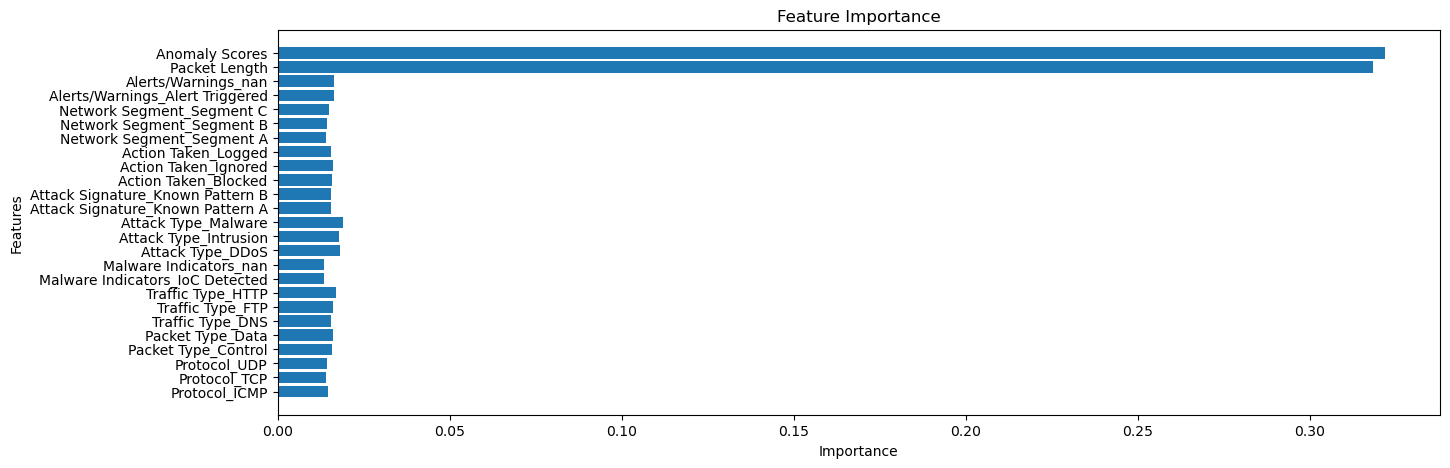

In [60]:
# cleaned_ft_names = [name.replace("num_", "").replace("cat_", "") for name in ft_names]
cleaned_ft_names = [name.replace("cat__", "").replace("num__", "") for name in ft_names]
plt.figure(figsize=(15, 5))
plt.barh(cleaned_ft_names, importances)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

In [61]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


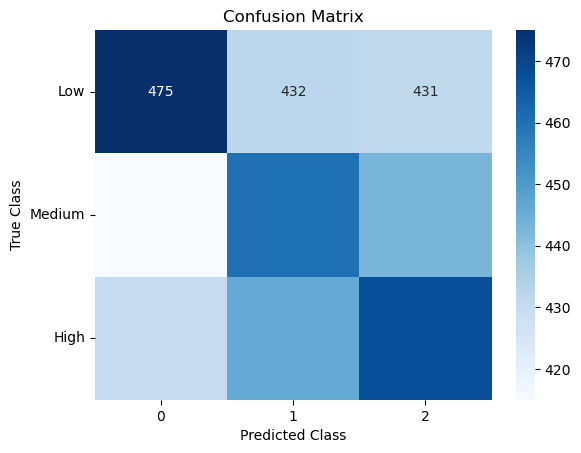

In [62]:
# Assuming y_true and y_pred are your true labels and predictions, respectively
cm = confusion_matrix(y_test, test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')

# Customize the y-axis labels and center them
class_labels = ['Low', 'Medium', 'High']
plt.yticks(ticks=np.arange(len(class_labels)) + 0.5, labels=class_labels, rotation=0, va='center')

# Label the axes
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

# Add a title
plt.title('Confusion Matrix')

# Show the plot
plt.show()